<a href="https://colab.research.google.com/github/BaijuThomasAV/Sandbox/blob/main/MR_Solution_sanbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

Below is the change in formula for FX relavtive Vs other sensi's Relative Difference


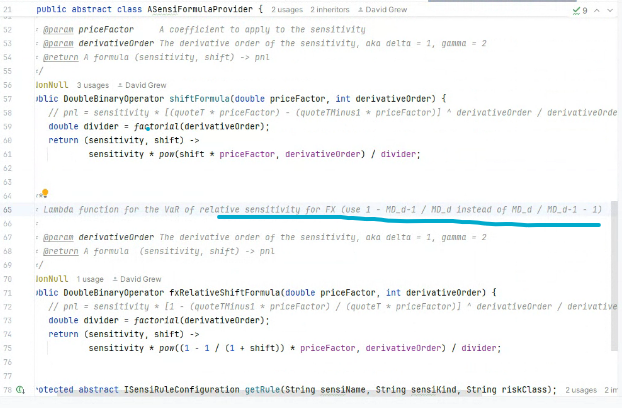

In [8]:
# Define function to calculate P&L components
def calculate_pnl(delta, gamma, theta, vega, volga, vanna, cross_gamma, spot_price_day1, spot_price_day2, dsigma, dt, relative_difference=False):
    # Calculate dS based on the relative or absolute difference
    if relative_difference:
        #dS = (spot_price_day2 / spot_price_day1) - 1  # Relative difference (percentage change)
        # For FX
        dS = 1- (spot_price_day1 / spot_price_day2)  # Relative difference (percentage change)
    else:
        dS = spot_price_day2 - spot_price_day1  # Absolute difference

    # Calculate each P&L component
    delta_pnl = delta * dS
    gamma_pnl = 0.5 * gamma * (dS ** 2)
    theta_pnl = theta * dt
    vega_pnl = vega * dsigma
    volga_pnl = 0.5 * volga * (dsigma ** 2)
    vanna_pnl = vanna * dS * dsigma

    # Cross Gamma P&L: accounts for interaction between spot price and volatility changes
    cross_gamma_pnl = cross_gamma * dS * dsigma

    # Output each P&L component
    print(f"Delta P&L: {delta_pnl:.2f}")
    print(f"Gamma P&L: {gamma_pnl:.2f}")
    print(f"Theta P&L: {theta_pnl:.2f}")
    print(f"Vega P&L: {vega_pnl:.2f}")
    print(f"Volga P&L: {volga_pnl:.2f}")
    print(f"Vanna P&L: {vanna_pnl:.2f}")
    print(f"Cross Gamma P&L: {cross_gamma_pnl:.2f}")

    # Calculate and return total P&L
    total_pnl = delta_pnl + gamma_pnl + theta_pnl + vega_pnl + volga_pnl + vanna_pnl + cross_gamma_pnl
    print(f"Total P&L: {total_pnl:.2f}")
    return total_pnl

#  input parameters
delta_previous = 1000
gamma_previous = 0
theta_previous = 0
vega_previous = 0
volga_previous = 0  #  input  volga
vanna_previous = 0  #  input vanna
cross_gamma_previous = 0  #  input cross-gamma
spot_price_day1 = 0.00658378
spot_price_day2 = 0.00671253
dsigma_input = 0  # Solution needs - Vega Current MD - Vega Previous MD)
dt_input = 0 / 365  # Input change in time (1 day)

# Call the function with absolute difference
print("Using Absolute Difference:")
calculate_pnl(delta_previous, gamma_previous, theta_previous, vega_previous, volga_previous, vanna_previous, cross_gamma_previous, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=False)

# Call the function with relative difference
print("\nUsing Relative Difference:")
calculate_pnl(delta_previous, gamma_previous, theta_previous, vega_previous, volga_previous, vanna_previous, cross_gamma_previous, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=True)

# Output statements
print("\nAsset Class Delta Explanation:")
print("1) Interest Rate (IR) Delta: Uses absolute basis point change.")
print("2) Credit/Repo Delta: Uses absolute basis point change.")
print("3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)")
print("4) Equity Delta: Uses relative price change.")
print("5) Commodity Delta: Uses relative price change.")
print("6) Vega and Volga is always Absolute change for all asset class.")
print("7) Theta change - TBD.")
print("8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)")
print("8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's settlement price dS and the logic of the Diff values will follow the same as the above asset class rules of Relative vs Absolute  # in solution also drag and drop Risk Factor secondary)")
print("8) Vanna MDX saved in training file)")
print("9) Cross_gamma- TBD)")
print("10) Note: For Taylor VaR, we asks for the shifts and not the prices so the above market data related to dS and dsigma is supplied as Shifts from the client and client can decide relative Vs Absolute)")


Using Absolute Difference:
Delta P&L: 0.13
Gamma P&L: 0.00
Theta P&L: 0.00
Vega P&L: 0.00
Volga P&L: 0.00
Vanna P&L: 0.00
Cross Gamma P&L: 0.00
Total P&L: 0.13

Using Relative Difference:
Delta P&L: 19.18
Gamma P&L: 0.00
Theta P&L: 0.00
Vega P&L: 0.00
Volga P&L: 0.00
Vanna P&L: 0.00
Cross Gamma P&L: 0.00
Total P&L: 19.18

Asset Class Delta Explanation:
1) Interest Rate (IR) Delta: Uses absolute basis point change.
2) Credit/Repo Delta: Uses absolute basis point change.
3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)
4) Equity Delta: Uses relative price change.
5) Commodity Delta: Uses relative price change.
6) Vega and Volga is always Absolute change for all asset class.
7) Theta change - TBD.
8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)
8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's settlement price dS and t

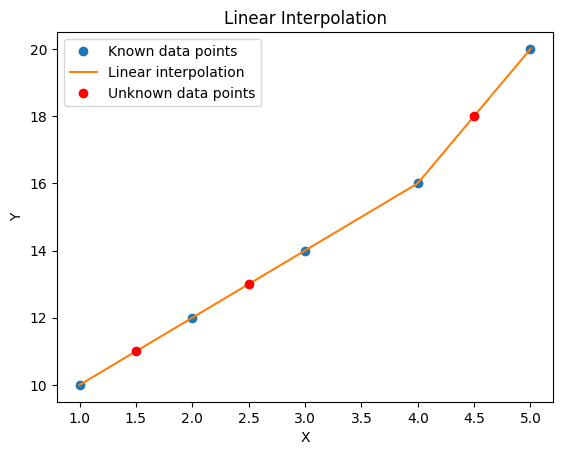

In [ ]:
##1. LinearUnivariateInterpolatorFactory: Linear interpolation along a single axis.

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Known data points (x-axis)
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 12, 14, 16, 20])

# Linear interpolation
linear_interpolator = interp1d(x, y, kind='linear')

# Interpolation for unknown points
x_new = np.linspace(1, 5, 100)
y_new = linear_interpolator(x_new)

# Unknown points
unknown_x = np.array([1.5, 2.5, 4.5])
unknown_y = linear_interpolator(unknown_x)

# Plotting
plt.plot(x, y, 'o', label='Known data points')
plt.plot(x_new, y_new, '-', label='Linear interpolation')
plt.plot(unknown_x, unknown_y, 'ro', label='Unknown data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Interpolation')
plt.legend()
plt.show()


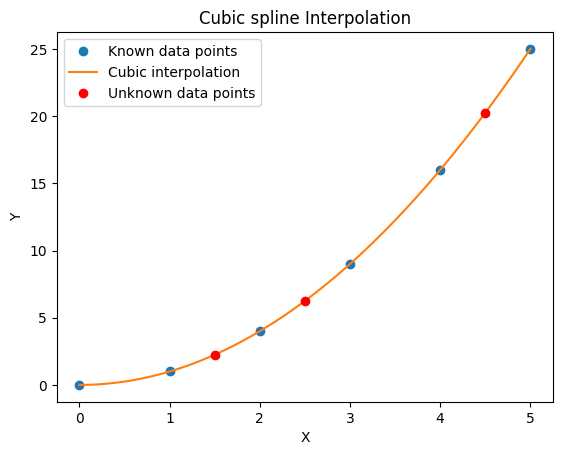

In [ ]:
##BicubicInterpolatorFactory

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Known data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])

# Cubic interpolation
cubic_interpolator = interp1d(x, y, kind='cubic')

# Interpolation for unknown points
x_new = np.linspace(0, 5, 100)
y_cubic = cubic_interpolator(x_new)

# Unknown points
unknown_x = np.array([1.5, 2.5, 4.5])
unknown_y = cubic_interpolator(unknown_x)

# Plotting
plt.plot(x, y, 'o', label='Known data points')
plt.plot(x_new, y_cubic, '-', label='Cubic interpolation')
plt.plot(unknown_x, unknown_y, 'ro', label='Unknown data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic spline Interpolation')
plt.legend()
plt.show()

Interpolated volatility at [1.5, 45, 0.95]: 0.1750


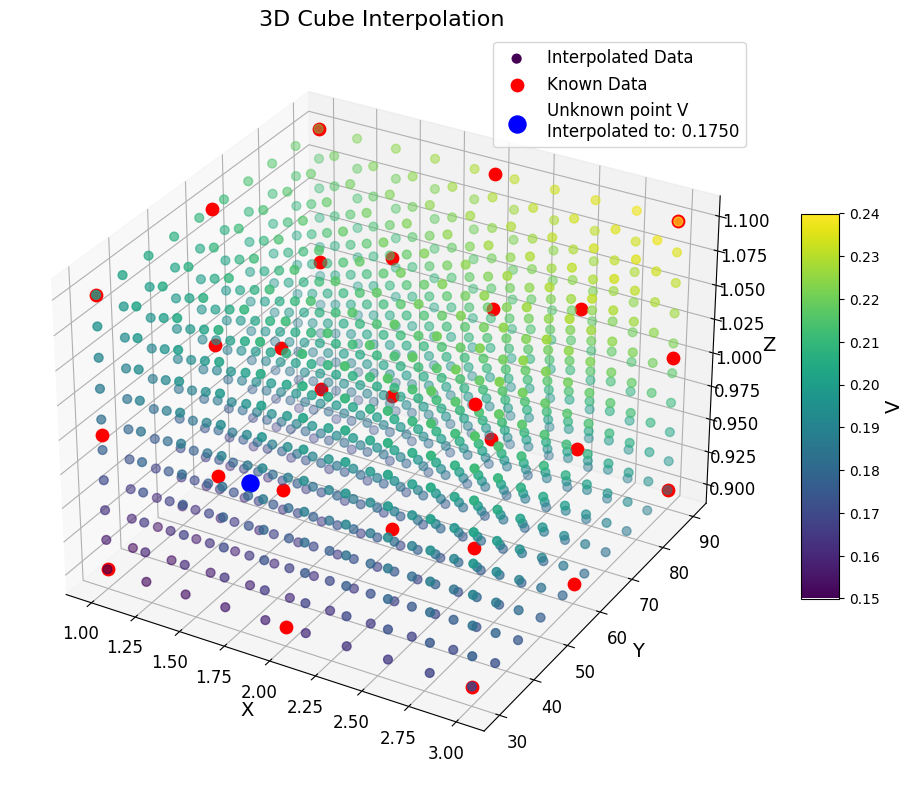

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D

# Known data points for a 3D grid (maturities, tenors, moneyness)
maturities = np.array([1, 2, 3])  # Maturities in years
tenors = np.array([30, 60, 90])   # Tenors in days
moneyness = np.array([0.9, 1.0, 1.1])  # Moneyness levels

# Example volatility surface data (volatility cube)
# Shape: (len(maturities), len(tenors), len(moneyness))
vol_cube = np.array([
    [[0.15, 0.18, 0.20], [0.16, 0.19, 0.21], [0.17, 0.20, 0.22]],  # Maturity = 1 year
    [[0.16, 0.19, 0.21], [0.17, 0.20, 0.22], [0.18, 0.21, 0.23]],  # Maturity = 2 years
    [[0.17, 0.20, 0.22], [0.18, 0.21, 0.23], [0.19, 0.22, 0.24]]   # Maturity = 3 years
])

# Create a trilinear interpolator
cube_interpolator = RegularGridInterpolator((maturities, tenors, moneyness), vol_cube)

# Interpolation at an unknown point (e.g., Maturity=1.5 years, Tenor=45 days, Moneyness=0.95)
unknown_point = [1.5, 45, 0.95]
interpolated_value = cube_interpolator(unknown_point).item()

# Now the scalar value can be formatted correctly
print(f"Interpolated volatility at {unknown_point}: {interpolated_value:.4f}")

# Create a finer grid for visualization
maturity_fine, tenor_fine, moneyness_fine = np.meshgrid(
    np.linspace(1, 3, 10),
    np.linspace(30, 90, 10),
    np.linspace(0.9, 1.1, 10),
    indexing='ij'
)

# Perform interpolation over the fine grid
fine_points = np.array([maturity_fine.ravel(), tenor_fine.ravel(), moneyness_fine.ravel()]).T
vol_fine = cube_interpolator(fine_points).reshape(maturity_fine.shape)

# Visualizing the 3D cube using a scatter plot (for simplicity)
fig = plt.figure(figsize=(12, 10))  # Increase figure size
ax = fig.add_subplot(111, projection='3d')

# Plot interpolated data points
scat = ax.scatter(maturity_fine, tenor_fine, moneyness_fine, c=vol_fine, cmap='viridis', s=40, label='Interpolated Data')

# Plot known points (volatility cube data)
for i, maturity in enumerate(maturities):
    for j, tenor in enumerate(tenors):
        for k, money in enumerate(moneyness):
            ax.scatter(maturity, tenor, money, color='red', s=80, label='Known Data' if (i, j, k) == (0, 0, 0) else "")

# Highlight the unknown point with a different color
ax.scatter(unknown_point[0], unknown_point[1], unknown_point[2], color='blue', s=150, label=f'Unknown point V\nInterpolated to: {interpolated_value:.4f}')

# Set labels with larger font sizes
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('Z', fontsize=14)
ax.set_title('3D Cube Interpolation', fontsize=16)

# Increase the font size for ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the legend with a larger font size
ax.legend(loc='upper right', fontsize=12)

# Add color bar to represent the volatility values (including the interpolated value)
cbar = plt.colorbar(scat, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('V', fontsize=14)

plt.show()



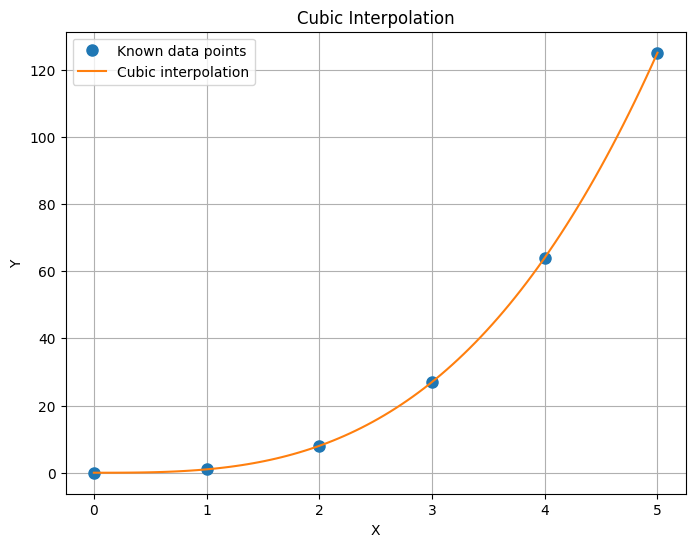

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Known data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 8, 27, 64, 125])  # y = x^3

# Cubic interpolation
cubic_interpolator = interp1d(x, y, kind='cubic')

# Interpolation for unknown points
x_new = np.linspace(0, 5, 100)
y_cubic = cubic_interpolator(x_new)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Known data points', markersize=8)
plt.plot(x_new, y_cubic, '-', label='Cubic interpolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Interpolation')
plt.legend()
plt.grid(True)
plt.show()


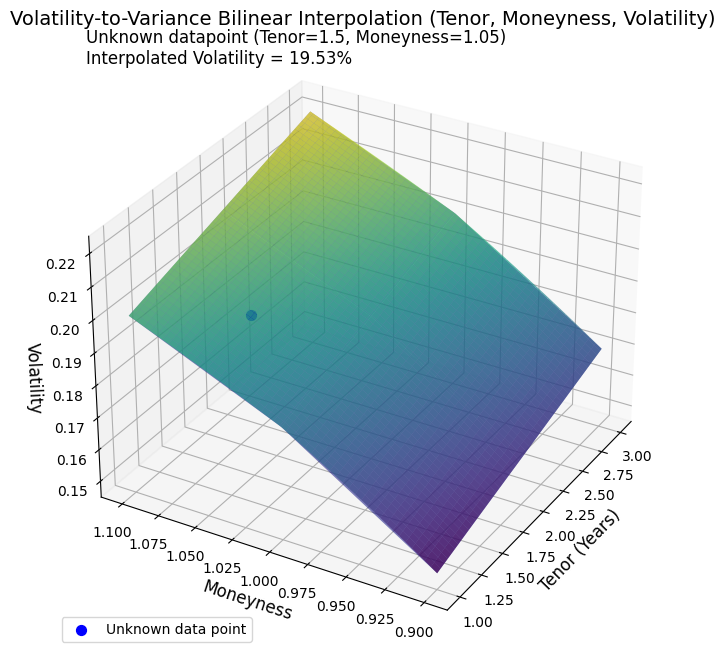

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D

# Known volatility data
tenors = np.array([1, 2, 3])  # Tenors
moneyness = np.array([0.9, 1.0, 1.1])  # Moneyness
volatility_surface = np.array([[0.15, 0.18, 0.20], [0.16, 0.19, 0.21], [0.17, 0.20, 0.22]])  # Volatility data

# Convert to variance (Volatility^2)
variance_surface = volatility_surface ** 2

# Bilinear interpolation in variance space
variance_interpolator = RegularGridInterpolator((tenors, moneyness), variance_surface)

# Interpolation at unknown point
unknown_point = [1.5, 1.05]  # Tenor = 1.5 years, Moneyness = 1.05
interpolated_variance = variance_interpolator(unknown_point)

# Convert back to volatility
interpolated_volatility = np.sqrt(interpolated_variance).item()  # Convert to scalar

# Prepare grid for plotting
tenor_grid, moneyness_grid = np.meshgrid(tenors, moneyness, indexing='ij')
volatility_grid = np.sqrt(variance_surface)

# Create a finer grid for interpolation
tenor_fine, moneyness_fine = np.meshgrid(np.linspace(1, 3, 100), np.linspace(0.9, 1.1, 100), indexing='ij')
variance_fine = variance_interpolator((tenor_fine, moneyness_fine))
volatility_fine = np.sqrt(variance_fine)

# Increase the size of the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original volatility surface (with tenor on x-axis and moneyness on y-axis)
ax.plot_surface(tenor_grid, moneyness_grid, volatility_grid, color='b', alpha=0.5, rstride=1, cstride=1)

# Plot interpolated surface
ax.plot_surface(tenor_fine, moneyness_fine, volatility_fine, cmap='viridis', alpha=0.7)

# Plot the unknown point in blue
unknown_plot = ax.scatter(unknown_point[0], unknown_point[1], interpolated_volatility, color='blue', s=50, label='Unknown data point')

# Labels with increased font size
ax.set_xlabel('Tenor (Years)', fontsize=12)  # Swap labels
ax.set_ylabel('Moneyness', fontsize=12)  # Swap labels
ax.set_zlabel('Volatility', fontsize=12)
ax.set_title('Volatility-to-Variance Bilinear Interpolation (Tenor, Moneyness, Volatility)', fontsize=14)

# Add annotation for the unknown point and interpolated value
annotation_text = f"Unknown datapoint (Tenor=1.5, Moneyness=1.05)\nInterpolated Volatility = {interpolated_volatility:.2%}"
ax.text2D(0.05, 0.95, annotation_text, transform=ax.transAxes, color='black', fontsize=12)

# Adjust the view angle for better visibility
ax.view_init(elev=30, azim=210)

# Position the legend at the lower left to avoid overlap
ax.legend([unknown_plot], ['Unknown data point'], loc='lower left', fontsize=10)

plt.show()



